In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
import numpy as np

In [132]:
data = pd.read_csv('dane/main data/hydro_klimat_merged_data.csv')

In [133]:
data['Data'] = pd.to_datetime(data['Data'])

In [134]:
data.sort_values(by='Data', inplace=True)

In [135]:
data_san = data[['Nazwa stacji', 'Data',  'Stan wody [cm]',\
                'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
               'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
                'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
                'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
               ]][data['Nazwa rzeki/jeziora'] == 'SAN (22)'] 

one-hot encoding rodzaj opadu

Zastosowano one-hot encoding na kolumnie ‘Rodzaj opadu’, ponieważ model LSTM wymaga danych liczbowych.

In [136]:
# data_ina['Rodzaj opadu [S/W/]'] = data_ina['Rodzaj opadu [S/W/]'].fillna('no_precip')
# encoded = pd.get_dummies(data_ina['Rodzaj opadu [S/W/]'], prefix='opad')
# data_ina = data_ina.join(encoded)

data_san['Rodzaj opadu [S/W/]'] = data_san['Rodzaj opadu [S/W/]'].fillna('no_precip')
encoded = pd.get_dummies(data_san['Rodzaj opadu [S/W/]'], prefix='opad')
data_san = data_san.join(encoded)

In [137]:
dzien_san = data_san['Data']
suma_opadow_san = data_san['Suma dobowa opadów nowa [mm]']
poziom_wody_san = data_san['Stan wody [cm]']
przeplyw_san = data_san['Przepływ [m^3/s]']
temp_sr_san = data_san['Średnia temperatura dobowa [°C]']
pokr_sn_san = data_san['Wysokość pokrywy śnieżnej [cm]']
temp_min_grunt_san = data_san['Temperatura minimalna przy gruncie [°C]']

Wykres poziom wód w czasie

In [138]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

# color = 'tab:blue'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Suma opadów [mm]', color=color)
# # ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
# ax1.bar(dzien_san, suma_opadow_san, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# # #ustawienie osi X
# # ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
# plt.xticks(rotation=45)

# ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
# color = 'tab:red'
# ax2.set_ylabel('Poziom wody [cm]', color=color)
# ax2.plot(dzien_san, poziom_wody_san, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # To ensure no overlap of y-axis labels
# plt.title('Suma opadów i poziom wody rzeki San na stacji Pszczyna')
# plt.show()

Wykres za ostatnie 100 dni

In [139]:
# data_san_100 = data_san.sort_values(by=['Data'])[-100:]
# dzien_san_100 = data_san_100['Data']
# suma_opadow_san_100 = data_san_100['Suma dobowa opadów nowa [mm]']
# poziom_wody_san_100 = data_san_100['Stan wody [cm]']
# przeplyw_san_100 = data_san_100['Przepływ [m^3/s]']
# temp_sr_san_100 = data_san_100['Średnia temperatura dobowa [°C]']
# pokr_sn_san_100 = data_san_100['Wysokość pokrywy śnieżnej [cm]']
# temp_min_grunt_san_100 = data_san_100['Temperatura minimalna przy gruncie [°C]']

In [140]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

# color = 'tab:blue'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Suma opadów [mm]', color=color)
# # ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
# ax1.bar(dzien_san_100, suma_opadow_san_100, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# # #ustawienie osi X
# # ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
# plt.xticks(rotation=45)

# ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
# color = 'tab:red'
# ax2.set_ylabel('Poziom wody [cm]', color=color)
# ax2.plot(dzien_san_100, poziom_wody_san_100, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # To ensure no overlap of y-axis labels
# plt.title('Suma opadów i poziom wody rzeki San na stacji Pszczyna')
# plt.show()

Usunięcie niepotrzebnych kolumn (wartosci nienumeryczne)

In [141]:
# data_ina = data_ina.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji',\
#                                   'Temperatura wody [st. C]'])

data_san = data_san.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji', \
                                  'Temperatura wody [st. C]', 'opad_no_precip'])

Podział zbioru

Podział na train, valid, test w proporcji 70/15/15

In [142]:
total_samples_san = len(data_san)
train_end_san = int(total_samples_san * 0.7)
validation_end_san = int(total_samples_san * 0.85)

train_san = data_san[:train_end_san]
validation_san = data_san[train_end_san:validation_end_san]
test_san = data_san[validation_end_san:]

In [143]:
print(len(train_san), len(validation_san), len(test_san))

766 164 165


Metoda naiwna 

In [144]:
n_ahead = 3
y_validation = validation_san.iloc[0]
y_test = test_san.iloc[0]

In [145]:
#na całości, kod z DL Chollet strona 222
def evaluate_naive_method_valid():
    batch_maes = []
    for i, step in enumerate(range(len(y_validation)- n_ahead)):
        preds, targets = y_validation[i], y_validation[i+n_ahead]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_valid())
#gdyby patrzeć tylko na dzień poprzedni o ile średnio taki wynik by się mylił (uwaga! miara mae taka jak w modelu!)

16.54285714285714


In [146]:
def evaluate_naive_method_test():
    batch_maes = []
    for i, step in enumerate(range(len(y_test)-n_ahead)):
        preds, targets = y_test[i], y_test[i+n_ahead]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_test())

25.97142857142857


#### Utworzenie sekwencji, aby można było predykować na szeregach czasowych 

In [147]:
def create_sequences(input_data, n_steps, n_ahead=1):
    X, y = [], []
    for i in range(len(input_data) - n_steps - n_ahead + 1):
        #indeks końca sekwencji
        end_ix = i + n_steps
        #Tworzenie sekwencji
        seq_x = input_data[i:end_ix, :]  # cechy i poziom wod w sekwencji wybranej dlugosci
        seq_y = input_data[end_ix+n_ahead-1, 0]  # poziom wód nastepnego dnia (lub nastepnego n_ahead dni dalej) po zakresie w wektorze cech
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Wybór sekwencji

In [148]:
# train_san

In [149]:
#uwaga zmiana typu danych!!
train_san = train_san.to_numpy()
validation_san = validation_san.to_numpy()
test_san = test_san.to_numpy()

In [150]:
n_steps = 1 #długość sekwencji
n_ahead = 3

X_train, y_train = create_sequences(train_san, n_steps=n_steps, n_ahead=n_ahead)
X_validation, y_validation = create_sequences(validation_san, n_steps=n_steps, n_ahead=n_ahead)
X_test, y_test = create_sequences(test_san, n_steps=n_steps, n_ahead=n_ahead)

In [151]:
y_train.shape

(763,)

Normalizacja zbioru treningowego

In [152]:
X_train.shape #drugi wymiar to n_steps

(763, 1, 10)

In [153]:
n_train, steps, features = X_train.shape
print(features)
print(X_train.reshape(-1, features).shape)
X_train.reshape(-1, features)

10
(763, 10)


array([[117. ,  12.3,   1.8, ...,  27.1,   0. ,   0. ],
       [111. ,  11.1,   0.8, ...,  21.3,   0. ,   1. ],
       [113. ,  13.9,   8.4, ...,  23.1,   0. ,   1. ],
       ...,
       [ 97. ,   2.1,   0.2, ...,  12.7,   0. ,   0. ],
       [ 97. ,   0.2,  -2.2, ...,  12.7,   0. ,   1. ],
       [ 97. ,   4.3,  -0.4, ...,  12.5,   0. ,   0. ]])

In [154]:
from sklearn.preprocessing import StandardScaler

#Zakładamy, że dane mają kształt: (próbki, kroki_czasowe, cechy)
n_train, steps, features = X_train.shape
n_val = X_validation.shape[0]
n_test = X_test.shape[0]

# Przekształcenie do 2D (scalanie kroków czasowych i próbek)
X_train_2d = X_train.reshape(-1, features)
X_val_2d = X_validation.reshape(-1, features)
X_test_2d = X_test.reshape(-1, features)

#Skalowanie
scaler = StandardScaler()
# StandardScaler oblicza średnią i odchylenie tylko z danych treningowych (fit_transform)
X_train_scaled = scaler.fit_transform(X_train_2d) 
#Potem tę samą skalę stosujemy do walidacji i testu (transform) (ochrona przed data_leakage)
X_val_scaled = scaler.transform(X_val_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Przywrócenie oryginalnych kształtów
X_train = X_train_scaled.reshape(n_train, steps, features)
X_validation = X_val_scaled.reshape(n_val, steps, features)
X_test = X_test_scaled.reshape(n_test, steps, features)

In [155]:
X_train.shape

(763, 1, 10)

In [156]:
# mean_train_san = train_san.mean(axis=0)
# train_san -= mean_train_san
# std_san = train_san.std(axis=0)
# train_san /= std_san

In [157]:
#sprawdzenie zmienności zmiennej celu
print(y_train.min(), y_train.max())
print(np.mean(y_train), np.std(y_train))
#zmienność nei jest zbyt duża, dlatego nie skaluję na razie

90.0 249.0
121.8348623853211 28.117502761576254


In [158]:
# #do ewentulanego przetestowania czy poprawi wyniki
# from sklearn.preprocessing import StandardScaler

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
# y_val_scaled = y_scaler.transform(y_validation.reshape(-1, 1))
# y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))


In [159]:
# np.mean(np.abs(y_validation[-2]-y_validation[-1]))

In [160]:
#czyli na danych nienormalizowanych 
# 0.44248616167015586 * np.std(validation_san[:, 1]) #musi być san bo sprawdam std przed walidacją
# 3.8cm

In [161]:
# validation_san[:, 1]

Płaska sieć z jedną gęstą warstwą (str 494 ML)

In [162]:
X_train.shape[-1]

10

In [163]:
# # from keras.models import Sequential
# # from keras import layers
# # from keras.layers import Flatten, Dense
# import keras

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[n_steps, X_train.shape[-1]]), #input_shape = (timesteps, features)
#     keras.layers.Dense(1)
# ])

# model.compile(optimizer='adam', loss='mae')

In [164]:
# history = model.fit(
#     X_train, y_train,
#     epochs=20,
#     validation_data=(X_validation, y_validation)
# )

In [165]:
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Training History')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [166]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()

# plt.show()

In [167]:
# min(val_loss)

Prosty model rekurencyjny

In [168]:
# X_train.shape

In [169]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [170]:
# # import keras

# model = keras.models.Sequential([
#     keras.layers.SimpleRNN(1, activation='relu',  input_shape=[None, X_train.shape[2]]) #tutaj daję wartość none, żeby mogła wykryć zalezności czasowe
# ])

# model.compile(optimizer='adam', loss='mae')

In [171]:
# history = model.fit(
#     X_train, y_train,
#     epochs=30,
#     validation_data=(X_validation, y_validation)
# )

In [172]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()

# plt.show()

In [173]:
# min(val_loss) #źle to wygląda

Prosty model LSTM

In [148]:
import keras
model = keras.models.Sequential([
    keras.layers.LSTM(256, activation='relu', input_shape=(n_steps, X_train.shape[2])),  # '2' represents the number of features in each time step
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
history = model.fit(
    X_train, y_train,
    epochs=100, #widać, że więcej warstw moze pomóc
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 121.9810 - val_loss: 160.6702
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.7394 - val_loss: 159.7298
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 121.2215 - val_loss: 157.1428
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 115.9038 - val_loss: 151.0785
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.5225 - val_loss: 139.5385
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.2963 - val_loss: 120.6633
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 79.5416 - val_loss: 99.9571
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 64.3450 - val_loss: 86.9972
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 55.7926 - val_loss: 77.4685
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.7106 - val_loss: 70.3873
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 43.9652 - val_loss: 63.4487
Epoch 12/100
24/24 ━━━━━━━━━

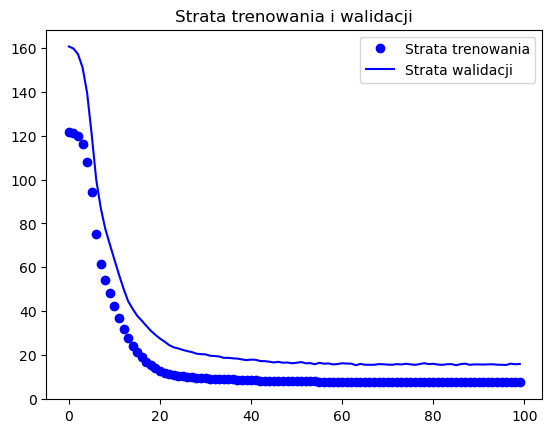

In [150]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [151]:
min(val_loss) 

15.384048461914062

Model ze stosem warstw rekurencyjnych

In [152]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [153]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_validation, y_validation)
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 119.7398 - val_loss: 160.9958
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.0716 - val_loss: 160.9535
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122.5920 - val_loss: 160.8906
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.7459 - val_loss: 160.3142
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.4372 - val_loss: 150.7979
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 107.2604 - val_loss: 105.3512
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.9676 - val_loss: 81.6927
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.2232 - val_loss: 71.3348
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.4381 - val_loss: 62.4885
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.7895 - val_loss: 51.4510
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.4583 - val_loss: 42.7512
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━

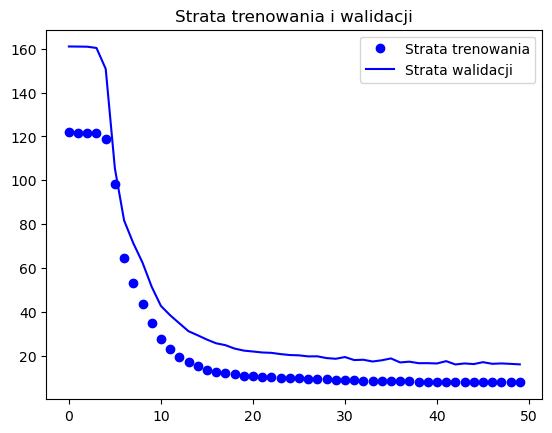

In [154]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [155]:
min(val_loss)

16.067441940307617

Lstm ze stosem warstw z mniejszą liczbą neuronów w każdej

In [168]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [169]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 121.2437 - val_loss: 160.9704
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.6714 - val_loss: 160.8763
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.1138 - val_loss: 160.6281
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 123.0024 - val_loss: 159.6975
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.8533 - val_loss: 156.7537
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 118.8124 - val_loss: 149.9137
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 112.0768 - val_loss: 137.5219
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 100.6368 - val_loss: 117.1692
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.8844 - val_loss: 94.8581
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.2316 - val_loss: 82.4943
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.1152 - val_loss: 76.6618
Epoch 12/100
24/24 ━━━━

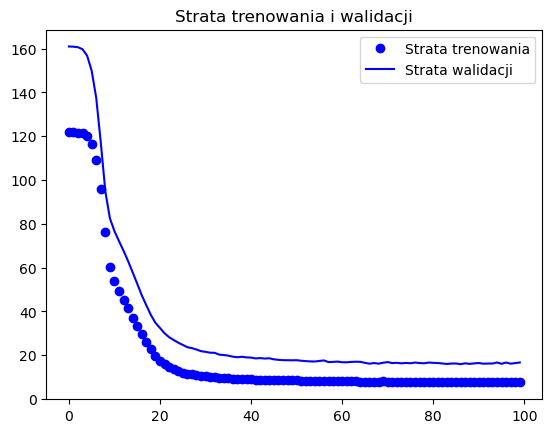

In [170]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [171]:
min(val_loss)

15.87255573272705

Lstm ze stosem większej liczby warstw

In [160]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [161]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_validation, y_validation)
)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - loss: 123.7509 - val_loss: 160.9683
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 120.9935 - val_loss: 160.8920
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 120.0373 - val_loss: 160.7307
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 122.0076 - val_loss: 158.2311
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 111.7712 - val_loss: 136.2027
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 78.8693 - val_loss: 100.1189
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 61.4957 - val_loss: 81.4421
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.7645 - val_loss: 65.6960
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.3748 - val_loss: 52.2619
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.5902 - val_loss: 44.7177
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.8788 - val_loss: 39.1411
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━

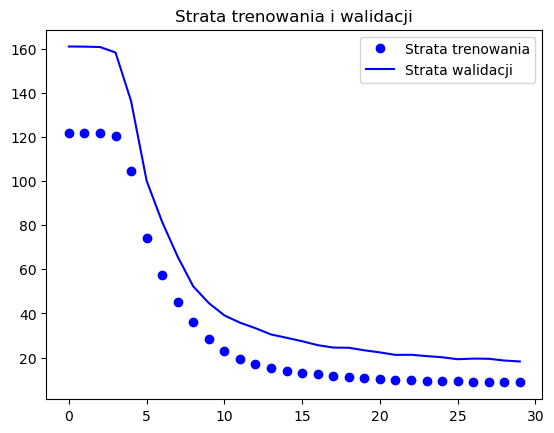

In [162]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [163]:
min(val_loss) 

18.26877784729004

Model lstm jak w ML STR  503 (modyfikacja zmiana f. aktywacji)

In [164]:
model = keras.models.Sequential([
    keras.layers.LSTM(32,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    keras.layers.LSTM(20,activation='relu'),  # return_sequences=False (domyślnie)
    keras.layers.Dense(1, use_bias=False) # keras.layers.TimeDistributed(keras.layers.Dense(1)) dawał by y_predict jako (batch_size, n_steps, 1)
])


model.compile(optimizer='adam', loss='mae')

In [165]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 122.1883 - val_loss: 160.9773
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 123.0235 - val_loss: 160.8584
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122.7812 - val_loss: 160.4624
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 119.9412 - val_loss: 159.0218
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 118.7051 - val_loss: 155.1393
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 114.7657 - val_loss: 147.7984
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.0374 - val_loss: 136.0448
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.3573 - val_loss: 118.9117
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.7888 - val_loss: 101.4592
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.0288 - val_loss: 89.0901
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.7767 - val_loss: 80.4260
Epoch 12/100
24/24 ━━━━

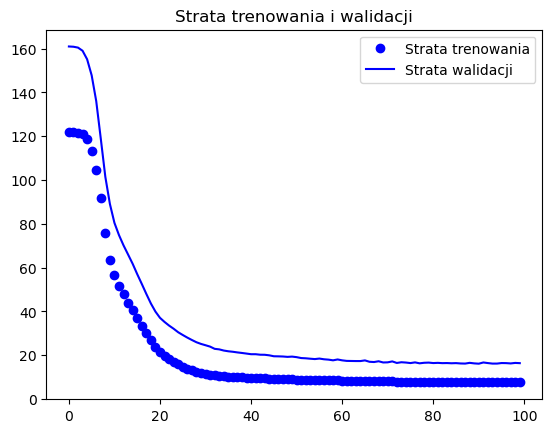

In [166]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [167]:
min(val_loss)

16.119850158691406

### optymalizacja hiperparametrów 2 najlepszych modeli

Model 1

In [172]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

# Budowanie modelu z przestrzenią hiperparametrów
def build_model_1(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        return_sequences = True,
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm2', min_value=4, max_value=16, step=2),
        activation='relu'
    ))
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=2),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [173]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_1,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, {best_hps.get('units_lstm2')},\
Dense: {best_hps.get('units_dense')},\
LR: {best_hps.get('learning_rate')}")


Trial 10 Complete [00h 00m 15s]
val_loss: 40.75580596923828

Best val_loss So Far: 16.236793518066406
Total elapsed time: 00h 02m 07s
Najlepsze hiperparametry: LSTM: 8, 12,Dense: 3,LR: 0.006990703300813505


In [174]:
model = keras.models.Sequential([
    keras.layers.LSTM(8, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(12, activation='relu'),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006990703300813505)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 122.2024 - val_loss: 159.1586
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116.7441 - val_loss: 133.6500
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85.6951 - val_loss: 65.0380
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.9296 - val_loss: 52.8671
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.9167 - val_loss: 43.5637
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.5951 - val_loss: 36.8854
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.0340 - val_loss: 32.8109
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6312 - val_loss: 29.0399
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5374 - val_loss: 27.3466
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.2041 - val_loss: 24.6647
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.8553 - val_loss: 22.8999
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━

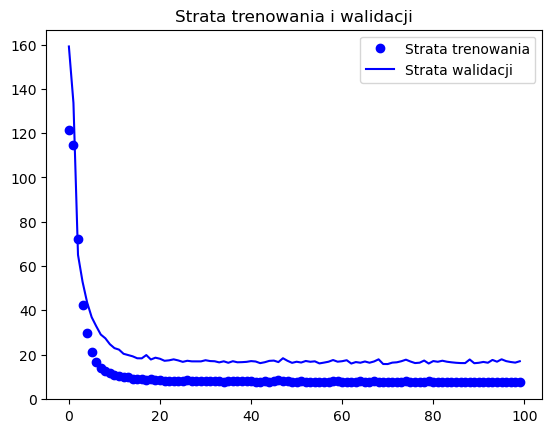

15.709249496459961


In [175]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

Model 2

In [176]:
# Budowanie modelu z przestrzenią hiperparametrów
def build_model_2(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=256, step=8),
        activation='relu',
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=16, step=2),
        activation='relu'
    ))
    
    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [177]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_2,
    objective='val_loss',
    max_trials=15,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, Dense: {best_hps.get('units_dense')},\
LR: {best_hps.get('learning_rate')}")


Trial 15 Complete [00h 00m 07s]
val_loss: 160.26873779296875

Best val_loss So Far: 15.455463409423828
Total elapsed time: 00h 02m 16s
Najlepsze hiperparametry: LSTM: 96, Dense: 5,LR: 0.007312945123669112


In [178]:
model = keras.models.Sequential([
    keras.layers.LSTM(96,activation='relu', input_shape=(n_steps, X_train.shape[2])),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1) 
])

optimizer = keras.optimizers.Adam(learning_rate=0.007312945123669112)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 119.3578 - val_loss: 148.8534
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.3362 - val_loss: 82.3753
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.7070 - val_loss: 51.1884
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.4437 - val_loss: 34.6414
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.6980 - val_loss: 26.0279
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.6438 - val_loss: 22.0365
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0714 - val_loss: 19.9113
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6166 - val_loss: 18.5784
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 9.0096 - val_loss: 18.2336
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.1412 - val_loss: 17.4954
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6077 - val_loss: 17.9621
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 

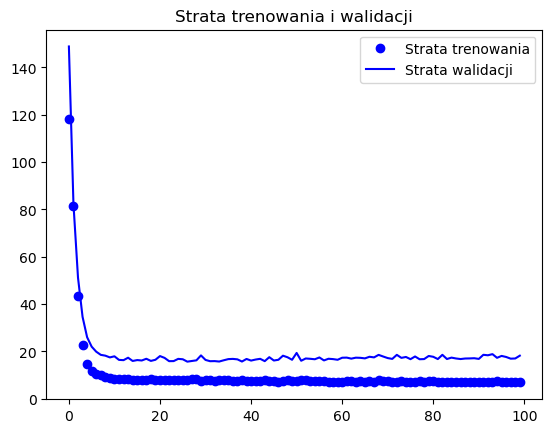

15.704702377319336


In [179]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

Najlepszy model z regularyzacją

In [182]:
model = keras.models.Sequential([
    keras.layers.LSTM(256, activation='relu', input_shape=(n_steps, X_train.shape[2])),  # '2' represents the number of features in each time step
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [183]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 121.8401 - val_loss: 160.5625
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 123.5534 - val_loss: 159.3849
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 120.0297 - val_loss: 156.1341
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.2301 - val_loss: 148.3766
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110.8990 - val_loss: 133.3086
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.7558 - val_loss: 110.4006
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77.3318 - val_loss: 93.4645
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 59.8800 - val_loss: 83.1875
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 54.7865 - val_loss: 76.1762
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 50.0145 - val_loss: 69.9622
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.7838 - val_loss: 63.4555
Epoch 12/200
24/24 ━━━━━

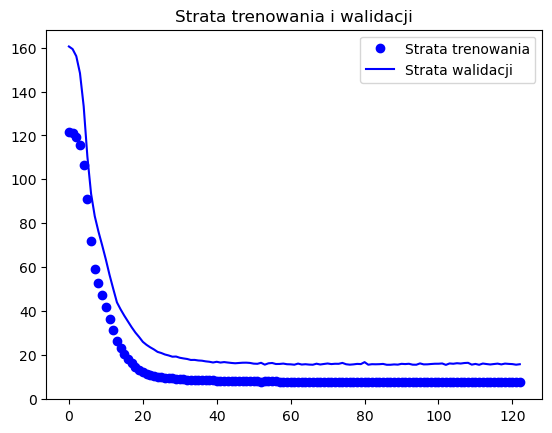

15.426426887512207


In [184]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

L1

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag

model = keras.models.Sequential([
    keras.layers.LSTM(256, activation='relu', input_shape=(n_steps, X_train.shape[2]),kernel_regularizer=l1(l1_reg)),  # '2' represents the number of features in each time step
    keras.layers.Dense(8, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=140,
    validation_data=(X_validation, y_validation)
)

C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 116.7498 - val_loss: 113.5886
Epoch 2/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 66.2046 - val_loss: 33.6489
Epoch 3/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.2754 - val_loss: 22.4524
Epoch 4/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.6356 - val_loss: 19.7818
Epoch 5/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6337 - val_loss: 17.6403
Epoch 6/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7029 - val_loss: 16.5876
Epoch 7/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5300 - val_loss: 16.8633
Epoch 8/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7240 - val_loss: 15.7595
Epoch 9/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3171 - val_loss: 15.6089
Epoch 10/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.5407 - val_loss: 15.4871
Epoch 11/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.7844 - val_loss: 16.0100
Epoch 12/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.0941 - val_loss: 15.2193
Epoch 69/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8330 - val_loss: 15.3232
Epoch 70/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8347 - val_loss: 17.5260
Epoch 71/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.7659 - val_loss: 15.4548
Epoch 72/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4560 - val_loss: 15.4559
Epoch 73/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6136 - val_loss: 15.7416
Epoch 74/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.8380 - val_loss: 15.5336
Epoch 75/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.7651 - val_loss: 15.4419
Epoch 76/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2284 - val_loss: 15.6387
Epoch 77/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.9452 - val_loss: 15.5214
Epoch 78/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2867 - val_loss: 15.3941
Epoch 79/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/st

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.5498 - val_loss: 16.1643
Epoch 136/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6650 - val_loss: 16.0557
Epoch 137/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6346 - val_loss: 16.7854
Epoch 138/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8744 - val_loss: 16.1725
Epoch 139/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.3457 - val_loss: 16.3831
Epoch 140/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.0899 - val_loss: 16.2753


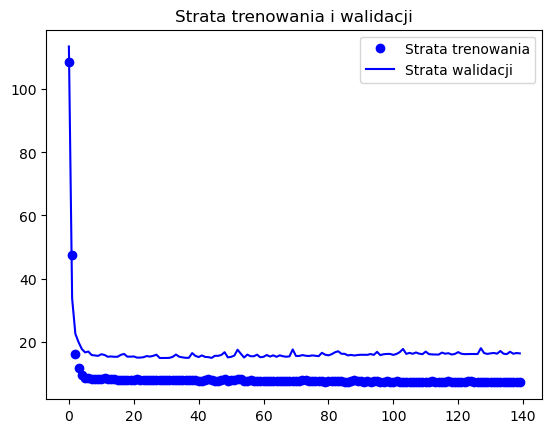

14.817580223083496


In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

L2

In [187]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam


l2_reg = 1e-4  

model = keras.models.Sequential([
    keras.layers.LSTM(256, activation='relu', input_shape=(n_steps, X_train.shape[2]),kernel_regularizer=l2(l2_reg)),  # '2' represents the number of features in each time step
    keras.layers.Dense(8, activation="relu",kernel_regularizer=l2(l2_reg)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=70,
    validation_data=(X_validation, y_validation)
)

Epoch 1/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 120.4864 - val_loss: 160.4635
Epoch 2/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 122.2001 - val_loss: 159.0778
Epoch 3/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 118.4622 - val_loss: 155.4740
Epoch 4/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 115.2501 - val_loss: 146.9297
Epoch 5/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 107.4597 - val_loss: 130.8459
Epoch 6/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 90.5326 - val_loss: 107.9000
Epoch 7/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.0142 - val_loss: 91.4844
Epoch 8/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.4388 - val_loss: 81.3303
Epoch 9/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.4300 - val_loss: 73.7792
Epoch 10/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.2072 - val_loss: 66.3464
Epoch 11/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.0801 - val_loss: 58.6348
Epoch 12/70
24/24 ━━━━━━━━━━━━━━━━━━━

Epoch 69/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.3671 - val_loss: 15.5834
Epoch 70/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5702 - val_loss: 15.4457


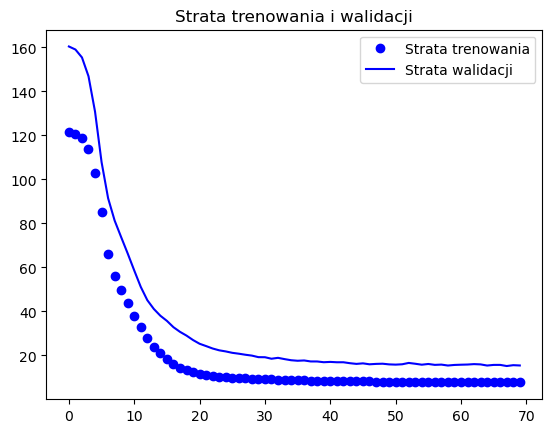

15.19675350189209


In [188]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M1

In [112]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag

model = keras.models.Sequential([
    keras.layers.LSTM(8, activation='relu', return_sequences=True,\
                      input_shape=(n_steps, X_train.shape[2]),kernel_regularizer=l1(l1_reg)),  # '2' represents the number of features in each time step
    keras.layers.LSTM(20, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006990703300813505)
model.compile(optimizer=optimizer, loss='mae')


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 120.9365 - val_loss: 159.3384
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 117.4406 - val_loss: 132.0022
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.2648 - val_loss: 84.0894
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.8444 - val_loss: 66.9598
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.4065 - val_loss: 56.2657
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.3856 - val_loss: 44.5747
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5860 - val_loss: 34.0403
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.2933 - val_loss: 27.9124
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5471 - val_loss: 25.9657
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6042 - val_loss: 23.1708
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0221 - val_loss: 20.0967
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7883 - val_loss: 15.9239
Epoch 69/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5205 - val_loss: 16.1429
Epoch 70/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0423 - val_loss: 16.0655
Epoch 71/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1154 - val_loss: 15.8317
Epoch 72/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4810 - val_loss: 16.8780
Epoch 73/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7116 - val_loss: 15.8069
Epoch 74/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8141 - val_loss: 16.1854
Epoch 75/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6879 - val_loss: 16.6432
Epoch 76/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4123 - val_loss: 16.2606
Epoch 77/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8201 - val_loss: 16.0771
Epoch 78/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2878 - val_loss: 15.7373
Epoch 79/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

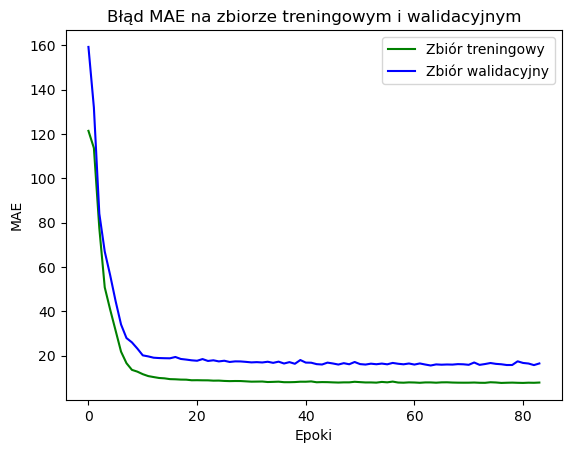

15.520883560180664


In [126]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M2

In [174]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag

model = keras.models.Sequential([
    keras.layers.LSTM(256, activation='relu', return_sequences=True,\
                      input_shape=(n_steps, X_train.shape[2]), kernel_regularizer=l1(l1_reg)),  # '2' represents the number of features in each time step
    keras.layers.LSTM(20, activation="relu", kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mae') #lr domyślne 0.001


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [175]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 122.6429 - val_loss: 160.7926
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.9403 - val_loss: 158.4881
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 118.6453 - val_loss: 142.3474
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 101.1556 - val_loss: 104.6455
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.6642 - val_loss: 88.6507
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.7681 - val_loss: 79.4967
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.2639 - val_loss: 70.7443
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41.8479 - val_loss: 62.2822
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34.5159 - val_loss: 53.8158
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26.8304 - val_loss: 47.3405
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.7775 - val_loss: 41.7710
Epoch 12/200
24/24 ━━━━━━━━

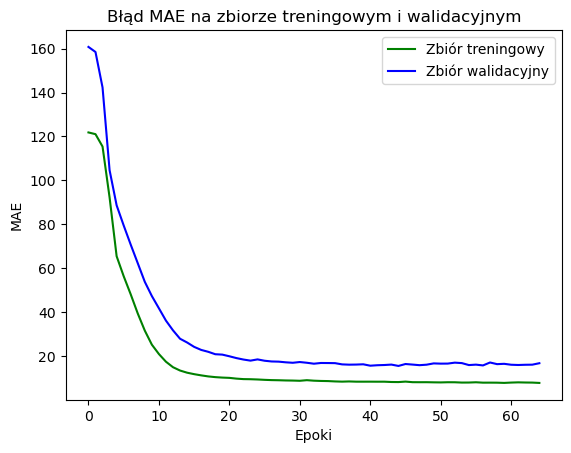

15.51750659942627


In [176]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

### Actual vs predicted M2

Scatter plots

In [177]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Przesunięcie predykcji o 3 dni (predykcja opóźniona względem rzeczywistości)

In [178]:
y_train = y_train[:-3]
train_pred = train_pred[3:]
y_validation = y_validation[:-3]
validation_pred = validation_pred[3:]
y_test = y_test[:-3]
test_pred = test_pred[3:]

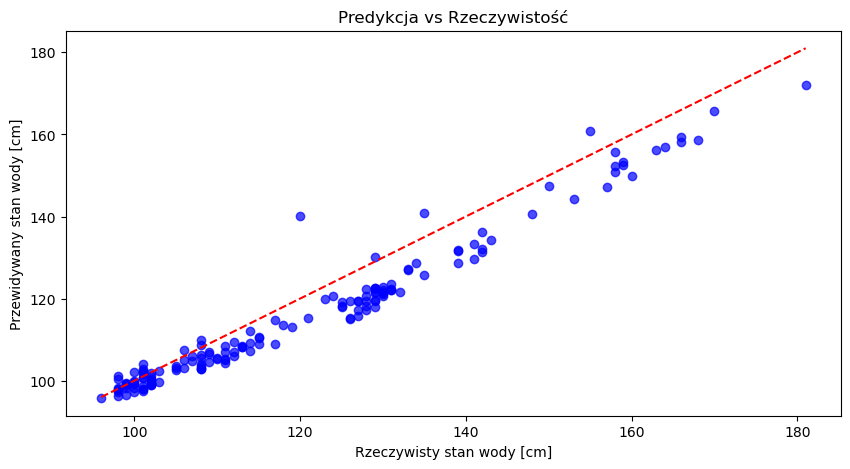

In [179]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [180]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([50, 300])
    ax1.legend()

Training MAE
Błąd MAE 3.6140911303068464
Validation MAE
Błąd MAE 9.258089186270025
Test MAE
Błąd MAE 4.940281993937942


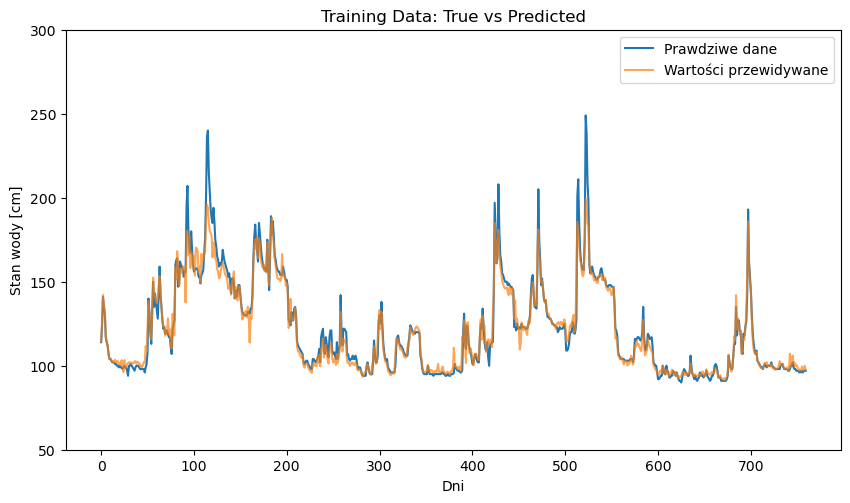

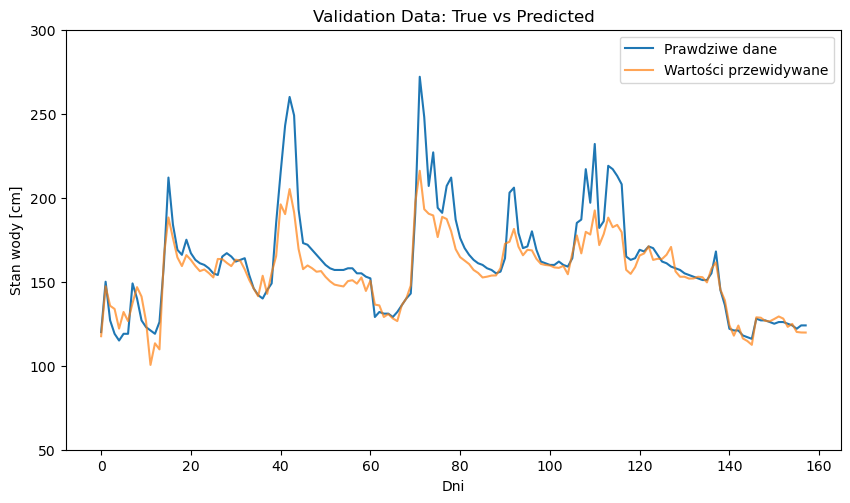

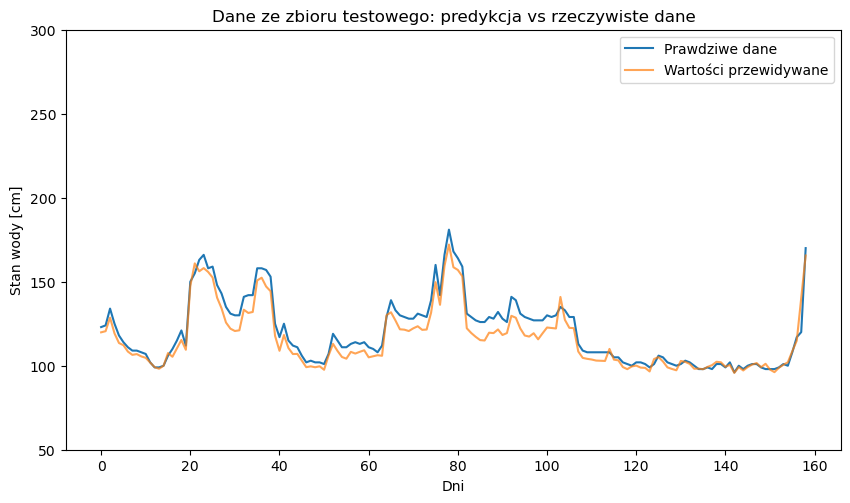

In [181]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

Ocena modelu

In [182]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [183]:
evaluate_model(y_test, test_pred)

RMSE: 6.0116
R²: 0.9051
sMAPE: 4.00%


### Actual vs predicted M1

Scatter plots

In [115]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Przesunięcie predykcji o 3 dni (predykcja opóźniona względem rzeczywistości)

In [116]:
y_train = y_train[:-3]
train_pred = train_pred[3:]
y_validation = y_validation[:-3]
validation_pred = validation_pred[3:]
y_test = y_test[:-3]
test_pred = test_pred[3:]

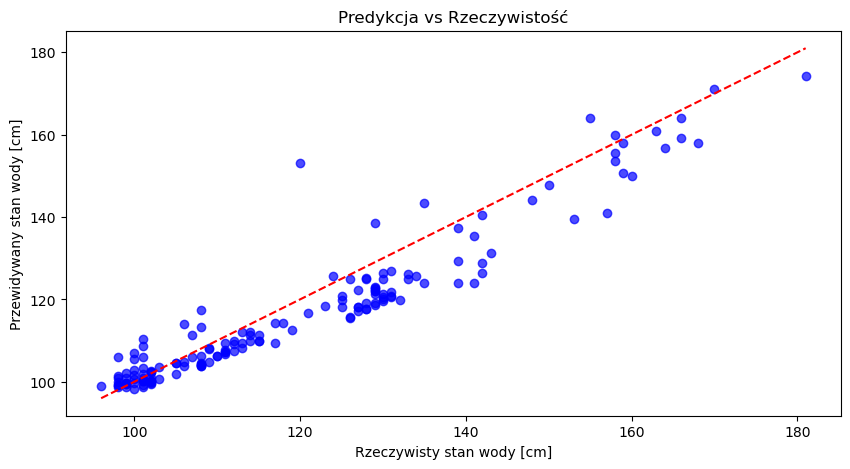

In [117]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [122]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([50, 300])
    ax1.legend()

Training MAE
Błąd MAE 3.9916413558156867
Validation MAE
Błąd MAE 9.126440941532955
Test MAE
Błąd MAE 5.0841781328309255


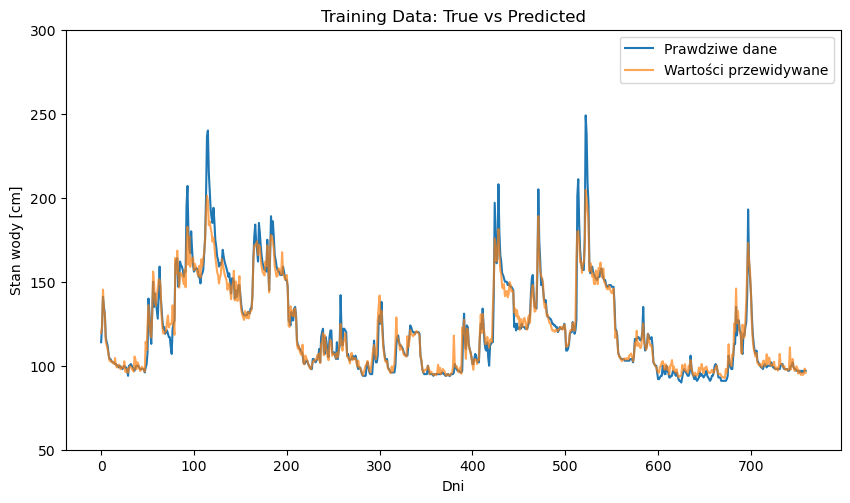

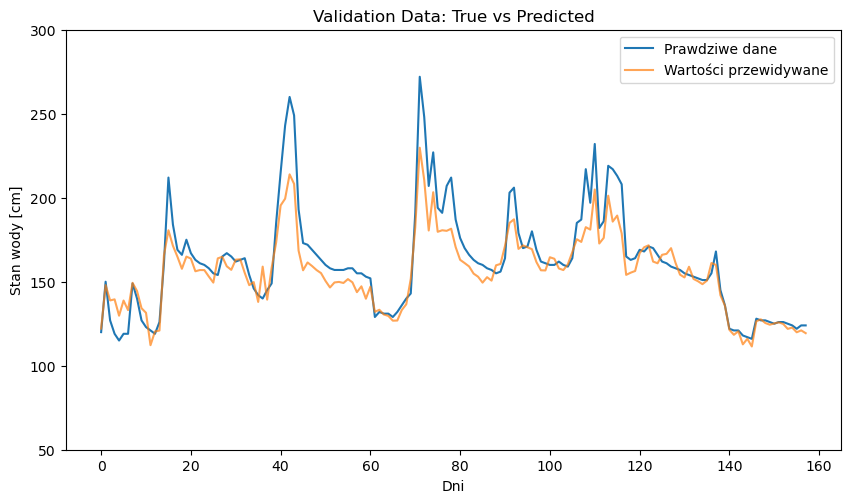

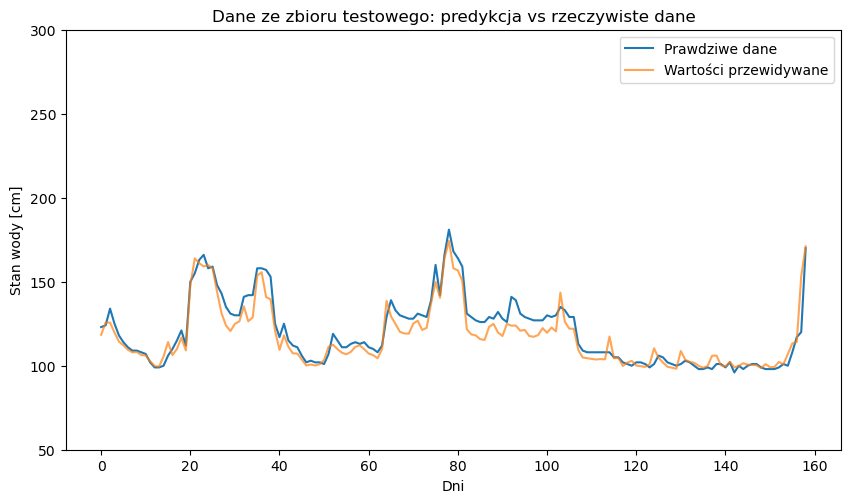

In [123]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

Ocena modelu

In [124]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [125]:
evaluate_model(y_test, test_pred)

RMSE: 6.7284
R²: 0.8811
sMAPE: 4.13%
